In [126]:
# Exercise 0

def github() -> str:
    """
    This function will return Bani Bedi's GitHub page for Problem Set 4.
    """

    return "https://github.com/banibedi/Econ481.git"

In [127]:
# Exercise 1

# Import modules
import pandas as pd
import requests

# Define the load_data function
def load_data() -> pd.DataFrame: # this defines the function 'load_data' and returns a panda Data Frame
    """
    This function accesses a file of Tesla's stock price history on the course website and returns data as a pandas Data Frame.
    """

    # Locate the URL with the relevant data
    base_url = 'https://lukashager.netlify.app' # This is the course website URL
    tesla_url = f'{base_url}/ECON-481/data/TSLA.csv' # This combines the course website URL with the unique URL that the Tesla URL is in; this is a necessary step since there is more than one csv file on the course website.

    # Extract data from the URL
    response = requests.get(tesla_url) # Sends an HTTP GET request to the URL contained in 'tesla_url'
    response.ok # Checks if our request was okay

    # Reads and Returns Tesla CSV data
    tesla_data = pd.read_csv(tesla_url) # This reads the CSV file contained in 'tesla_url'
    return tesla_data # Returns tesla data in pandas DataFrame
tesla_df = load_data() # Loads the tesla_data DataFrame
print(tesla_df.head()) # Prints first few rows of the Tesla CSV file


         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


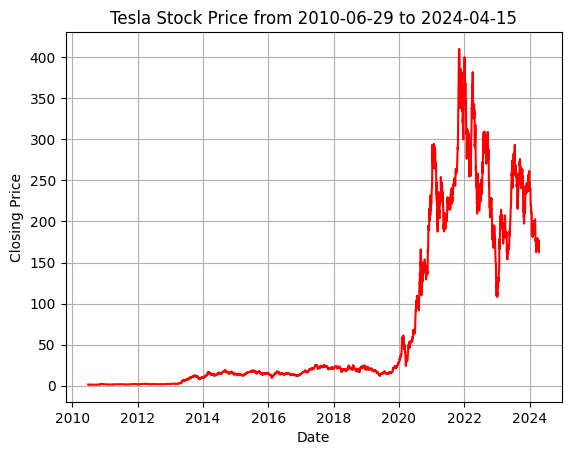

In [128]:
# Exercise 2

# Import modules
import pandas as pd
import matplotlib.pyplot as plt

# Define the plot_close function
def plot_close(df: pd.DataFrame, start: str = '2010-06-29', end: str = '2024-04-15') -> None:
    """
    This writes a function called 'plot_close' which takes the output of load_data and an option start and end date, and plots the closing price of the stock between those dates as a line graph.
    It includes the date range in the title of the graph.
    """

    # Extract the date and close price columns
    df['Date'] = pd.to_datetime(df['Date']) # Converts 'Date' column of the DataFrame from strings to datetime objects
    mask = (df['Date'] >= start) & (df['Date'] <= end) # Creates a boolean to ensure that dates are within the desired range
    filtered_df = df.loc[mask] # Applies the mask to filter the DataFrame

    # Create a line plot
    plt.plot(filtered_df['Date'], filtered_df['Close'], color='red')

    # Add a grid
    plt.grid(True) # Adds a grid to the graph

    # Create labels
    plt.xlabel('Date') # Adds the 'x' axis label
    plt.ylabel('Closing Price') # Adds the 'y' axis label
    plt.title(f'Tesla Stock Price from {start} to {end}') # Adds the title of the graph

    # Show the plot
    plt.show()

plot_close(tesla_df) # Calls the function; shows the closing price of tesla from the data stored in 'tesla_df'

In [129]:
# Exercise 3

# Understanding Random Walk
  # States that various "technical" or "chartist" procedures for predicting stock prices are completely without value
  # Technicians state that history repeats itself
  # Null hypothesis: the movement or a stock today and the movement of a stock tomorrow are uncorrelated
  # Alternative hypothesis: the movement of a stock today and the movement of a stock tomorrow are correlated

# The regression model
  # zt = change in stock's closing price
  # zt-1 = change in stocks closing price at time t-1 (previous period)
  # estimate B0 and B1 from regression
  # et = represents random shocks from model

# Import modules
import pandas as pd
import statsmodels.api as sm
import pandas as pd

def autoregress(df: pd.DataFrame) -> float: # This defines the function autoregress which is expected to be a DataFrame and the expected result is a float
    """
    This function performs a regression to test the random walk hypothesis on Tesla's stock price history.
    It returns the t-statistic for the β0 coefficient from the regression.
    The regression does not have an intercept.
    HC1 standard errors are used for the regression.
    """

     # Convert 'Date' column to datetime and set as the index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
   
    # Set lagged changes
    df['Lag_Close'] = df['Close'].shift(1, freq='B') # Note: frequency was not specifed in the assignment
    df = df.asfreq('B').dropna()

    # Calculate daily closing price change
    df['Diff_Close'] = df['Close'].diff() # The diff function calculates the difference between each consecutive closing price
    df = df.dropna() # Drops any values if there is no preceding value to subtract from

    # Define zt-1 and zt
    X = df['Diff_Close'].shift(1)[1:]  # Defines the 'x' variable; excludes the first NaN value
    y = df['Diff_Close'][1:]  # The 'y' variable

    # Create OLS regression model
    model = sm.OLS(y, X, hasconst=False) # Create regression without an intercept like assignment suggests  
    results_robust = model.fit(cov_type='HC1') # Fits model to datat; HC1 standard errors like assignment suggests
    
    # Get the t-statistic for β0
    t_stat = results_robust.tvalues[0]  # Index 0 related to B0 since there is no intercept

    # Print summary
    print(results_robust.summary())

    return t_stat

# Print t-statistic
t_stat = autoregress(tesla_df)
print("The t-statistic for β0 is:", t_stat)

                                 OLS Regression Results                                
Dep. Variable:             Diff_Close   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                             0.5653
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                       0.452
Time:                        00:38:21   Log-Likelihood:                         -9942.7
No. Observations:                3342   AIC:                                  1.989e+04
Df Residuals:                    3341   BIC:                                  1.989e+04
Df Model:                           1                                                  
Covariance Type:                  HC1                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

C:\Users\bedib\AppData\Local\Temp\ipykernel_316\1901661586.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat = results_robust.tvalues[0]  # Index 0 related to B0 since there is no intercept


In [130]:
# Exercise 4

# Note: A LAG WAS NOT INCORPORATED INTENTIONALLY BECAUSE QUESTION 4 DID NOT SPECIFY IT LIKE QUESTION 3  

def autoregress_logit(df: pd.DataFrame) -> float:
    """
    This function called 'autoregress_logit' takes the output from Exercise 1 and returns a t-statistic on B0 from the logistic regression.
    """
    
    # Calculate daily closing price (same as last question)
    df['Diff_Close'] = df['Close'].diff()
    df = df.dropna()

    # Creating a new columnn where 'Diff Close' is greater than 0
    df['Positive_value'] = (df['Diff_Close'] > 0).astype(int) # Creates a Boolean series and converts it into integers

    # Define variables (similar to last question)
    X = df['Diff_Close'].shift(1)[1:]  
    y = df['Positive_value'][1:] # Now takes from new column rather than 'Diff Close' like last question

    # Add intercept given that is a logistic regression model
    X = sm.add_constant(X)

    # Perform logistic regression
    model = sm.Logit(y, X)
    results = model.fit()

    # Calculates the t-statistic for β0
    t_stat = results.tvalues[0]

    # Print summary
    print(results.summary())

    return t_stat

# Print t-statistic
t_stat = autoregress_logit(tesla_df)
print("The t-statistic for β0 is:", t_stat)

Optimization terminated successfully.
         Current function value: 0.692430
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:         Positive_value   No. Observations:                 3343
Model:                          Logit   Df Residuals:                     3341
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:               0.0002388
Time:                        00:38:21   Log-Likelihood:                -2314.8
converged:                       True   LL-Null:                       -2315.3
Covariance Type:            nonrobust   LLR p-value:                    0.2930
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0668      0.035      1.929      0.054      -0.001       0.135
Diff_Close    -0.0078      0.

C:\Users\bedib\AppData\Local\Temp\ipykernel_316\3103049735.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive_value'] = (df['Diff_Close'] > 0).astype(int) # Creates a Boolean series and converts it into integers
C:\Users\bedib\AppData\Local\Temp\ipykernel_316\3103049735.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat = results.tvalues[0]


In [131]:
# Exercise 5

import pandas as pd
import matplotlib.pyplot as plt

def plot_delta(df: pd.DataFrame) -> None:
    """
    This function called 'plot_delta' takes the output from Exercise 1 and plots the change in xt for the full dataset using matplotlib.
    """
    
    df['Diff_Close'] = df['Close'].diff() # Same command as last questions
    df = df.dropna() # Same command as last questions

    plt.plot(df.index, df['Diff_Close'], label='Daily Change in Closing Price', color = 'magenta') # Plot data
    plt.title('Tesla Stock Change in Closing Price') # Title
    plt.xlabel('Date') # X-axis label
    plt.ylabel('Change in Closing Price') # Y-axis label
    plt.legend() # Legend
    plt.grid(True) # Grid
    plt.show() # Display the plot

tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df.set_index('Date', inplace=True)

plot_delta(tesla_df)

KeyError: 'Date'